In [1]:
# magic command
%matplotlib inline


In [2]:
# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

In [4]:
# Read the city data and store it into a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data and store it into a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Inspect the City Data dataframe
# Get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Double check for null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Check data types (looking for driver_count to be integer)
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of datapoints from urban cities.
sum(city_data_df["type"] == "Urban")

66

In [11]:
# Get the number of datapoints from suburban cities.
sum(city_data_df["type"] == "Suburban")

36

In [12]:
# Get the number of datapoints from rural cities.
sum(city_data_df["type"] == "Rural")

18

In [13]:
# Inspect Ride Data Dataframe
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# check for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
#Check datatypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merge Dataframes
pyber_data_df = pd.merge(ride_data_df,city_data_df,how = "left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create a DataFrame for the Urban City Data
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Create the DataFrames for Rural and Suburban Data
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [20]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
# Get the number of rides for rural and suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [23]:
# Get the average fare for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [32]:
# Get the average number of drivers for each city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

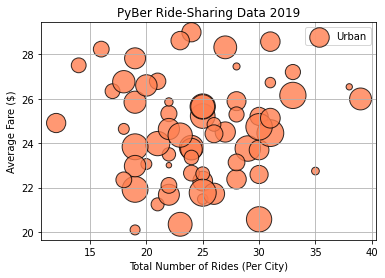

In [41]:
# Create a scatter plot for each type of city with x = number of rides, y -axis = average fare, bubble size = average number of drivers
# Start with urban
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10*urban_driver_count, 
            color = "coral",
            alpha = 0.8,
            edgecolor = "black",
            label = "Urban",
            linewidths = 1
        )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data 2019")
plt.legend()
plt.grid(True)
plt.show()


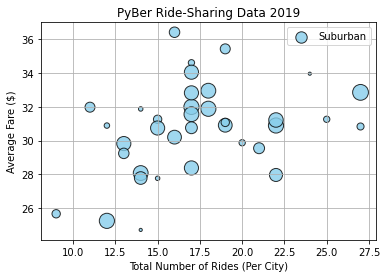

In [40]:
# Create the scatter plot for suburban cities
plt.scatter( suburban_ride_count,
           suburban_avg_fare,
           s = 10* suburban_driver_count,
           c = "skyblue",
           label = "Suburban",
           alpha = 0.8,
           edgecolor = "black",
           linewidths = 1)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data 2019")
plt.legend()
plt.grid(True)
plt.show()

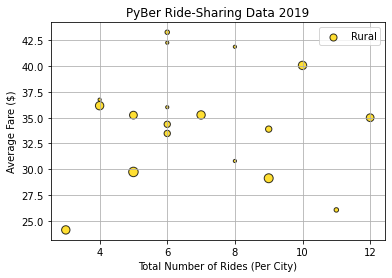

In [42]:
# Create the scatter plot for rural cities
plt.scatter( rural_ride_count,
           rural_avg_fare,
           s = 10* rural_driver_count,
           c = "gold",
           label = "Rural",
           alpha = 0.8,
           edgecolor = "black",
           linewidths = 1)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data 2019")
plt.legend()
plt.grid(True)
plt.show()

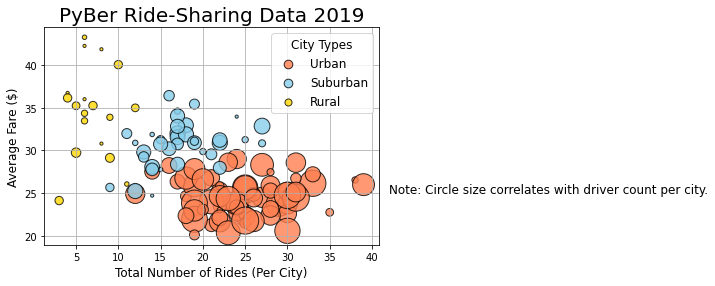

In [53]:
# Combine all 3 scatter plots in one
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10*urban_driver_count, 
            color = "coral",
            alpha = 0.8,
            edgecolor = "black",
            label = "Urban",
            linewidths = 1
            )

plt.scatter( suburban_ride_count,
           suburban_avg_fare,
           s = 10* suburban_driver_count,
           c = "skyblue",
           label = "Suburban",
           alpha = 0.8,
           edgecolor = "black",
           linewidths = 1
           )

plt.scatter( rural_ride_count,
           rural_avg_fare,
           s = 10* rural_driver_count,
           c = "gold",
           label = "Rural",
           alpha = 0.8,
           edgecolor = "black",
           linewidths = 1
           )

# Add other elements of the graph
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data 2019", fontsize = 20)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded", scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes - [75]
lgnd.get_title().set_fontsize(12)
                  
# Add a label about circle size
plt.text(42,25,"Note: Circle size correlates with driver count per city.", fontsize = "12", wrap = True)

# Save the figure
plt.savefig("analysis/Fig1.png")

plt.show()

